## Radar Raingage Intercomparisons

In [1]:
%matplotlib inline
from rain import *

**Philadelphia: **

In [ ]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"

rg = RainGage(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")
rad = RainGage(path=path, name="Phila_gage_{YEAR}_fill.dat", year=range(2003,2015))

**St. Louis: **

In [2]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/'

rg = Rain(path=path, name='StLouis_gage_{YEAR}.dat', year=range(2009, 2015), ngages=100, units='in')
rad = Rain(path=path, name='StLouis_radar_{YEAR}.dat', year=range(2009, 2015), ngages=100, units='mm')
dt = pd.Timedelta('6 hours 15 minutes')
rg.rate.index = rg.rate.index+dt
rg.df.index = rg.df.index+dt

In [ ]:
rg.ll_file = 'll_loc{YEAR}.txt'.format(YEAR=rg.year)

### Let's Explore!

In [3]:
p = RadarGage(gage=rg, radar=rad)
p.save_path = './output/StLouis/'

In [4]:
p.year = rg.year

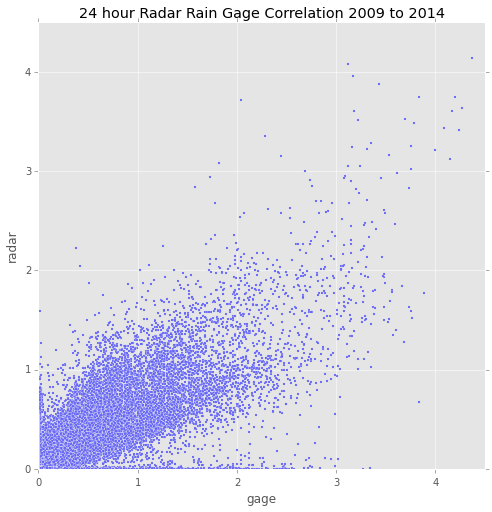

In [75]:
p.plot_correlation(time_step='24H', base=12)

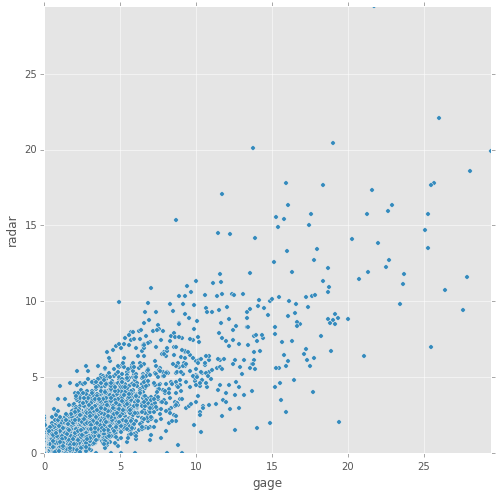

In [76]:
m = min(p.rate.mean(axis=2).max())
p.rate.mean(axis=2).plot(kind='scatter', x='gage', y='radar', figsize=(8,8), xlim=(0, m), ylim=(0, m))
plt.show()

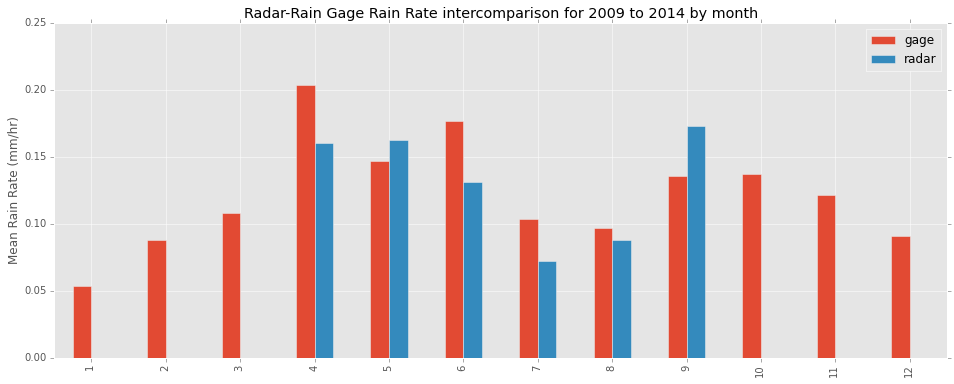

In [77]:
title = 'Radar-Rain Gage Rain Rate intercomparison for {YEAR} by month'.format(YEAR=rg.year)

df = p.rate.groupby(p.rate.axes[1].month).mean().mean(axis=2)
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title(title)
plt.savefig(p.save_path+'{title}.jpg'.format(title=title))
plt.show()

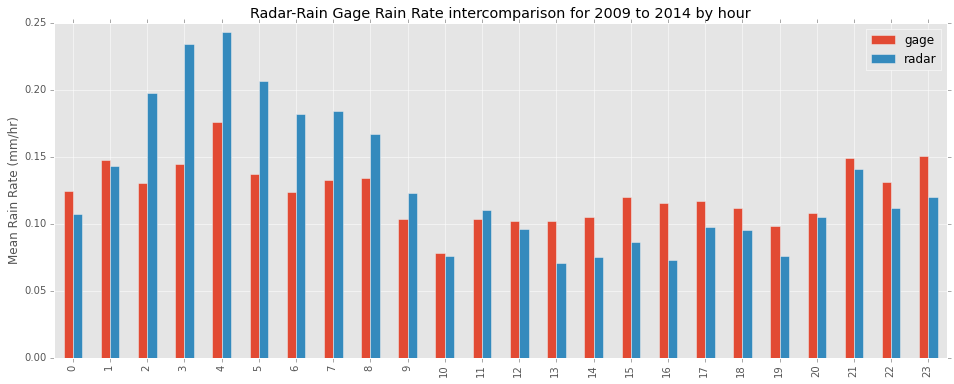

In [78]:
title = 'Radar-Rain Gage Rain Rate intercomparison for {YEAR} by hour'.format(YEAR=rg.year)

df = p.rate.groupby(p.rate.axes[1].hour).mean().mean(axis=2)
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title(title)
plt.savefig(p.save_path+title+'.jpg')
plt.show()

Choose you threshold carefully. You will notice that it makes a big difference in the results

In [10]:
p.thresh = rg.thresh = .254

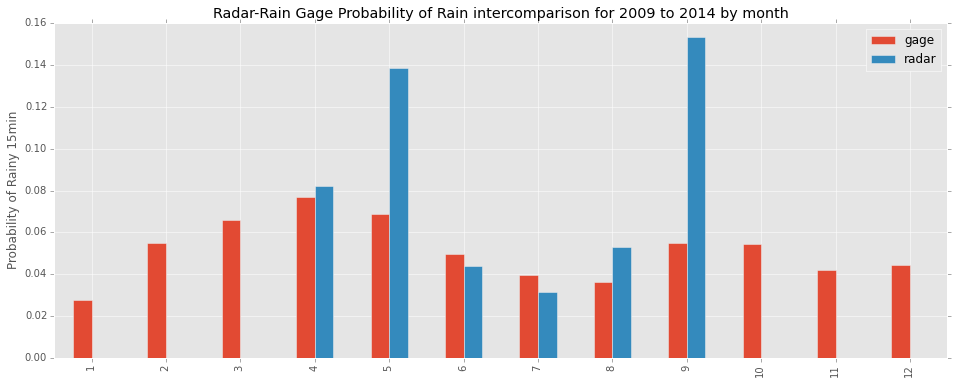

In [79]:
title = 'Radar-Rain Gage Probability of Rain intercomparison for {YEAR} by month'.format(YEAR=rg.year)

p.wet = p.rate.mean(axis=2) >= p.thresh
p.wet.groupby(p.wet.index.month).mean().plot(kind='bar', figsize=(16,6))
plt.ylabel('Probability of Rainy 15min')
plt.title(title)
plt.savefig(p.save_path+title+'.jpg')
plt.show()

### Plot the rainfall in space using shaded points

In [69]:
from common import *

In [70]:
p.ll_file = 'll_loc{YEAR}.txt'.format(YEAR=2011)
p.get_ll(cols=['lat','lon'])

In [71]:
daily = p.rate.resample('24H', base=12, axis=1, **p.resample_kwargs)
day = p.ll.join(daily.to_frame().loc['2011-06-26 12:00:00'])
day = day[day.lat != 0]

In [73]:
p.save_path

'./output/StLouis/'

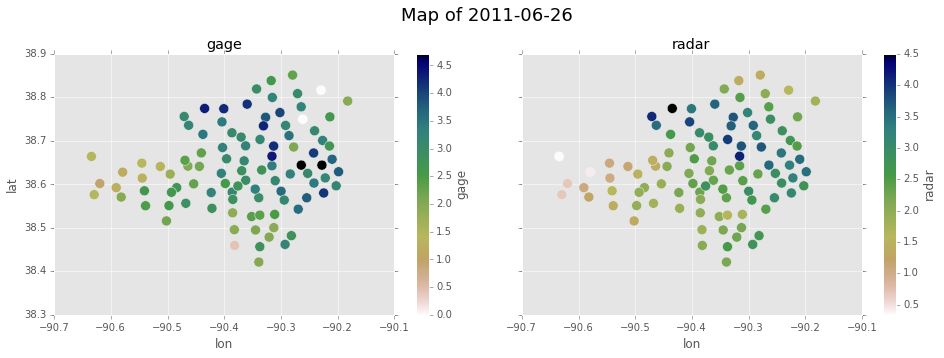

In [80]:
map_rain(day, p.save_path, 'Map of 2011-06-26')